### Car Price Prediction


Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.



### Business Goal


We are required to model the price of cars with the available independent variables. 
It will be used by the management to understand how exactly the prices vary with the independent variables. 
They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Extracting, and Understanding the Data

In [2]:
#load the dataset into pandas
df = pd.read_csv(r'C:\Users\user\Downloads\CarPrice_Assignment.csv')

In [3]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
df.shape

(205, 26)

In [5]:
#evaluate missing data.
missing_data =df.isnull()
missing_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#count missing value per column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

car_ID
False    205
Name: car_ID, dtype: int64

symboling
False    205
Name: symboling, dtype: int64

CarName
False    205
Name: CarName, dtype: int64

fueltype
False    205
Name: fueltype, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

doornumber
False    205
Name: doornumber, dtype: int64

carbody
False    205
Name: carbody, dtype: int64

drivewheel
False    205
Name: drivewheel, dtype: int64

enginelocation
False    205
Name: enginelocation, dtype: int64

wheelbase
False    205
Name: wheelbase, dtype: int64

carlength
False    205
Name: carlength, dtype: int64

carwidth
False    205
Name: carwidth, dtype: int64

carheight
False    205
Name: carheight, dtype: int64

curbweight
False    205
Name: curbweight, dtype: int64

enginetype
False    205
Name: enginetype, dtype: int64

cylindernumber
False    205
Name: cylindernumber, dtype: int64

enginesize
False    205
Name: enginesize, dtype: int64

fuelsystem
False    205
Name: fuelsystem, dtype: int64

boreratio
Fa

In [7]:
df.describe(include="all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Cleaning, Data Wrangling and Preparation

In [10]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [13]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [14]:
#Splitting the company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
#correcting some spelling error in the CompanyName column.
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df.CompanyName.unique().size

22

In [18]:
df['price'].value_counts().to_frame()

,price
5572.0,2
6692.0,2
7957.0,2
7898.0,2
6229.0,2
...,...
6377.0,1
30760.0,1
16925.0,1
15998.0,1


### EXPLORATIVE DATA ANALYSIS AND DATA VISUALIZATION

#### Visualization of both Categorical and Numerical Data

<AxesSubplot:xlabel='count', ylabel='CompanyName'>

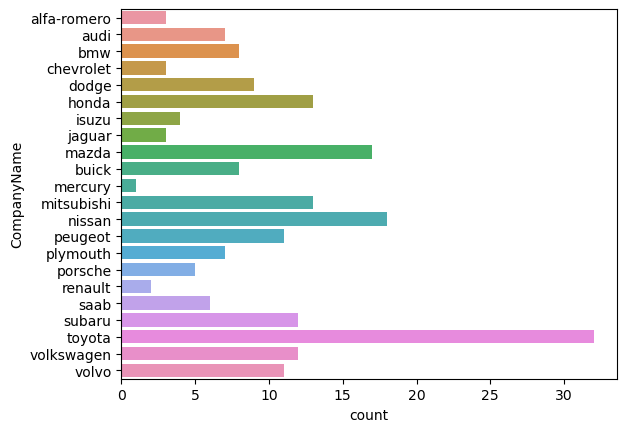

In [19]:
# Countplot
sns.countplot(data = df, y ="CompanyName" ,label ="count")

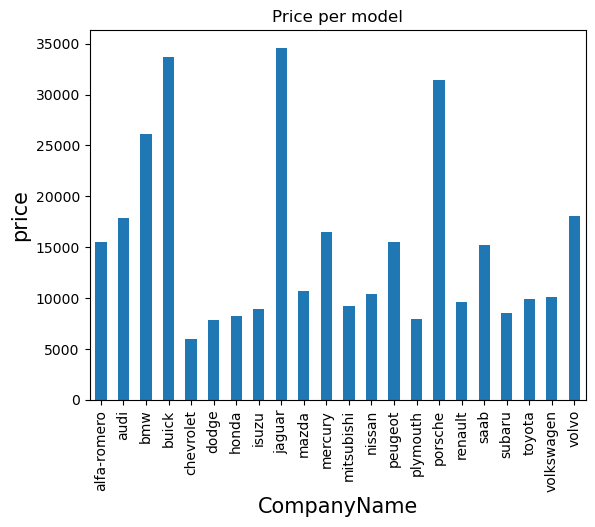

In [20]:
###Let's create a bar chart for the price per Company Name
df.groupby("CompanyName").mean()['price'].plot(kind='bar')
plt.xlabel("CompanyName",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.title('Price per model')
plt.show()

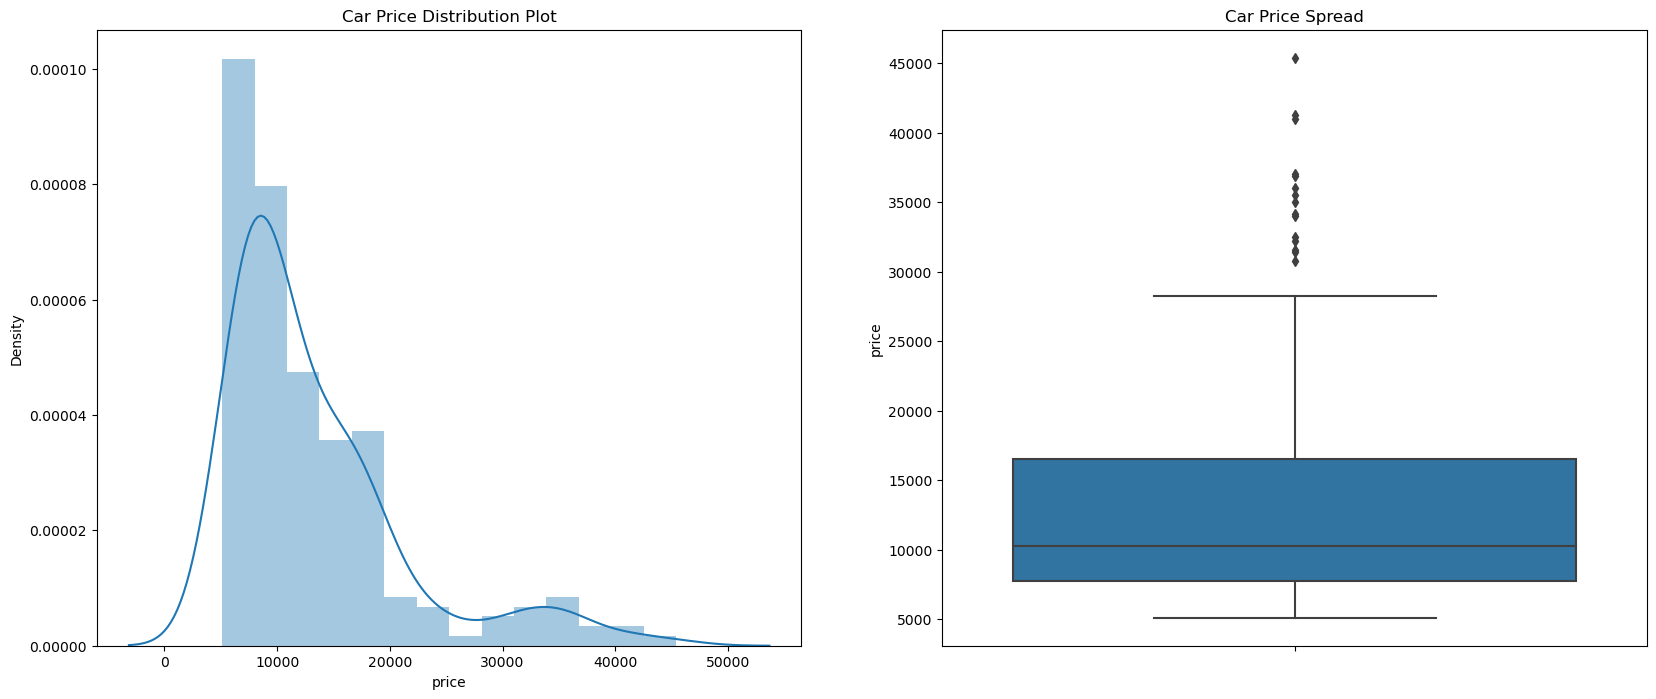

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

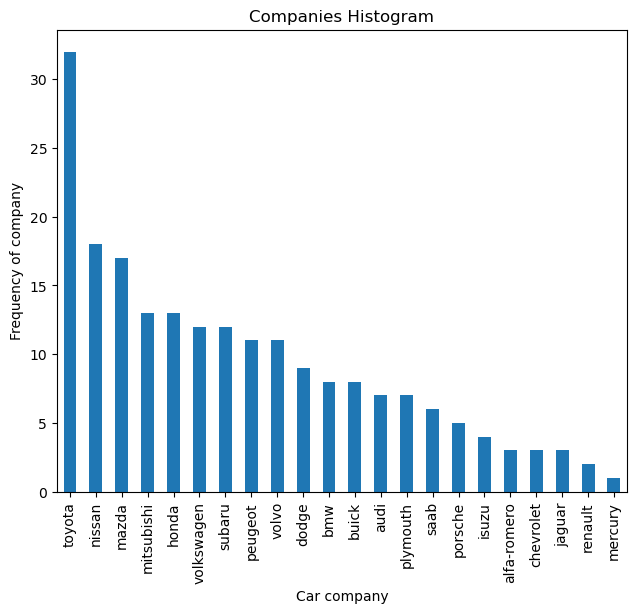

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))

#barchart Company_name
plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')




plt.show()


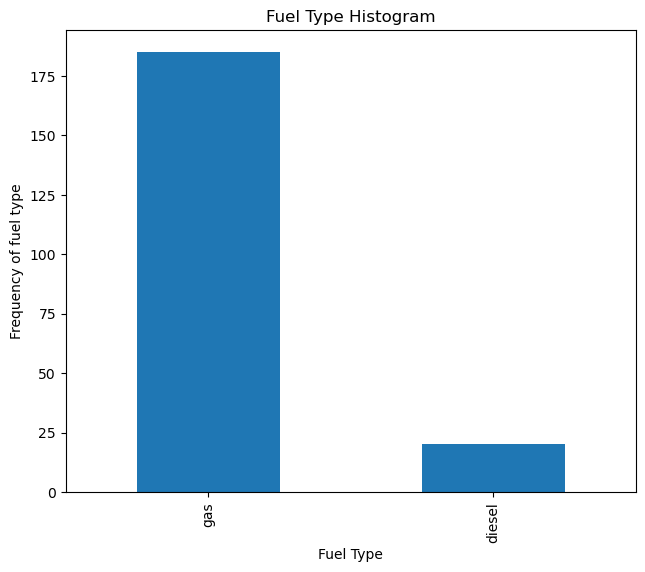

In [23]:
plt.figure(figsize=(25, 6))

#barchart Fuel_Type
plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')




plt.show()

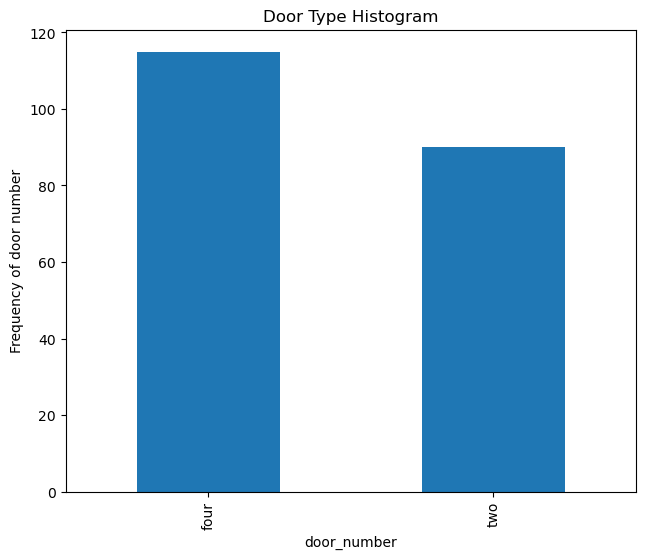

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))

#barchart door_number
plt.subplot(1,3,2)
plt1 = df.doornumber.value_counts().plot(kind='bar')
plt.title('Door Type Histogram')
plt1.set(xlabel = 'door_number', ylabel='Frequency of door number')




plt.show()

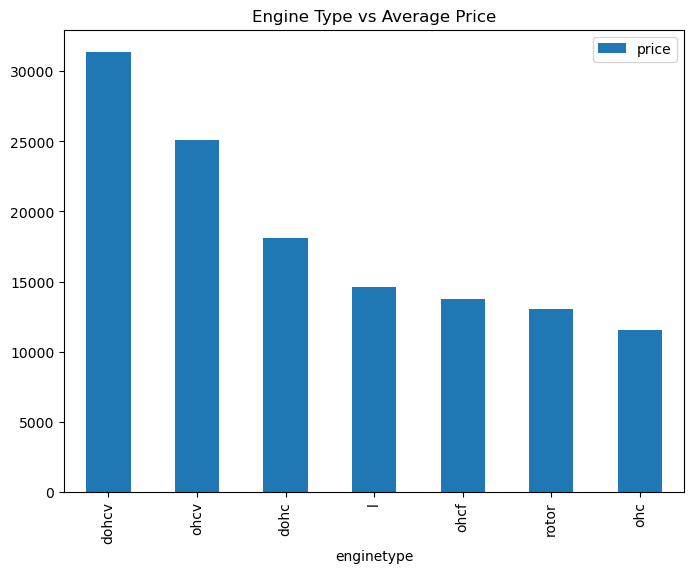

In [25]:
#Barchart for Enginetype vs price
#import matplotlib.pyplot as plt

base = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
base.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


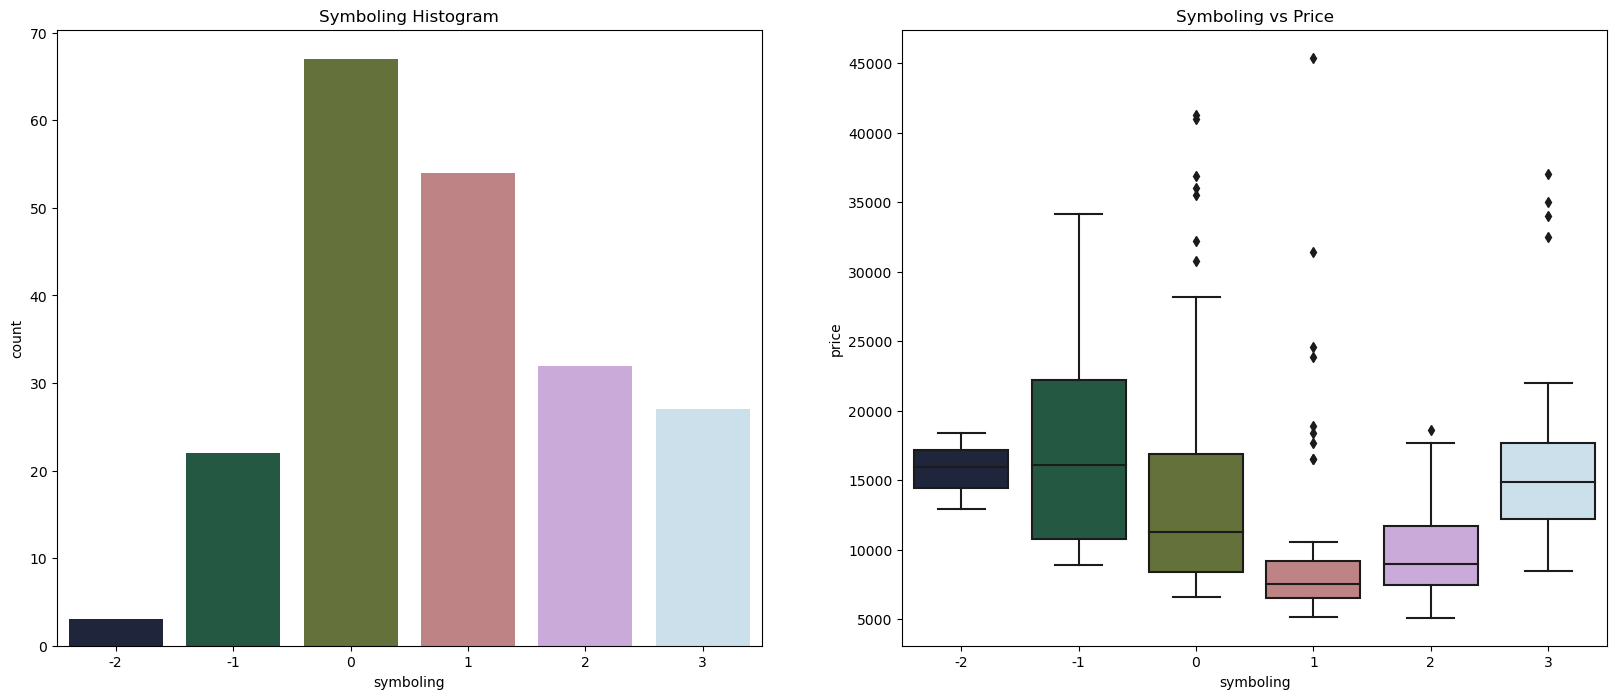

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

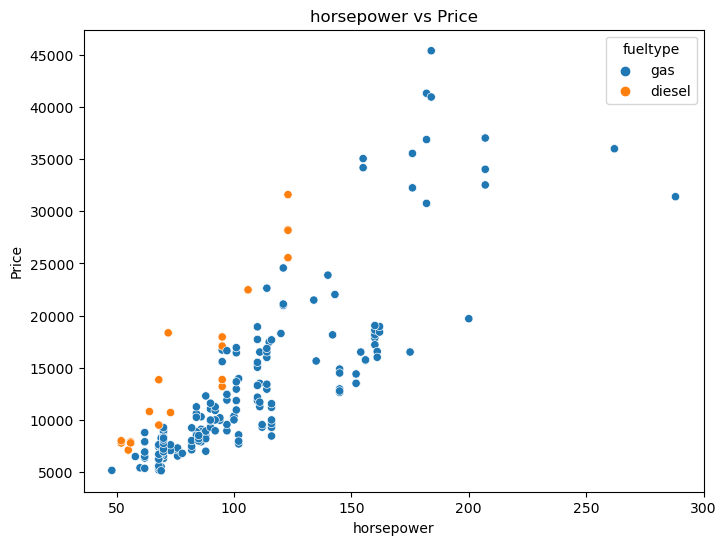

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(8,6))

plt.title('horsepower vs Price')
sns.scatterplot(x=df['horsepower'],y=df['price'],hue=df['fueltype'])
plt.xlabel('horsepower')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

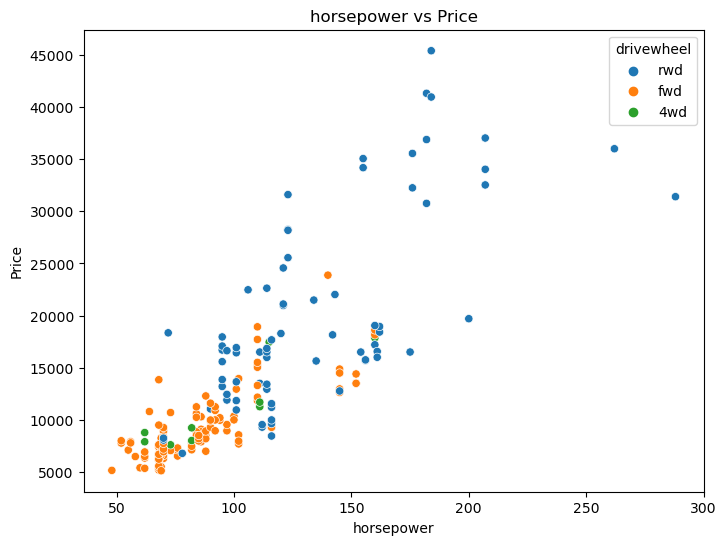

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(8,6))

plt.title('horsepower vs Price')
sns.scatterplot(x=df['horsepower'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('horsepower')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

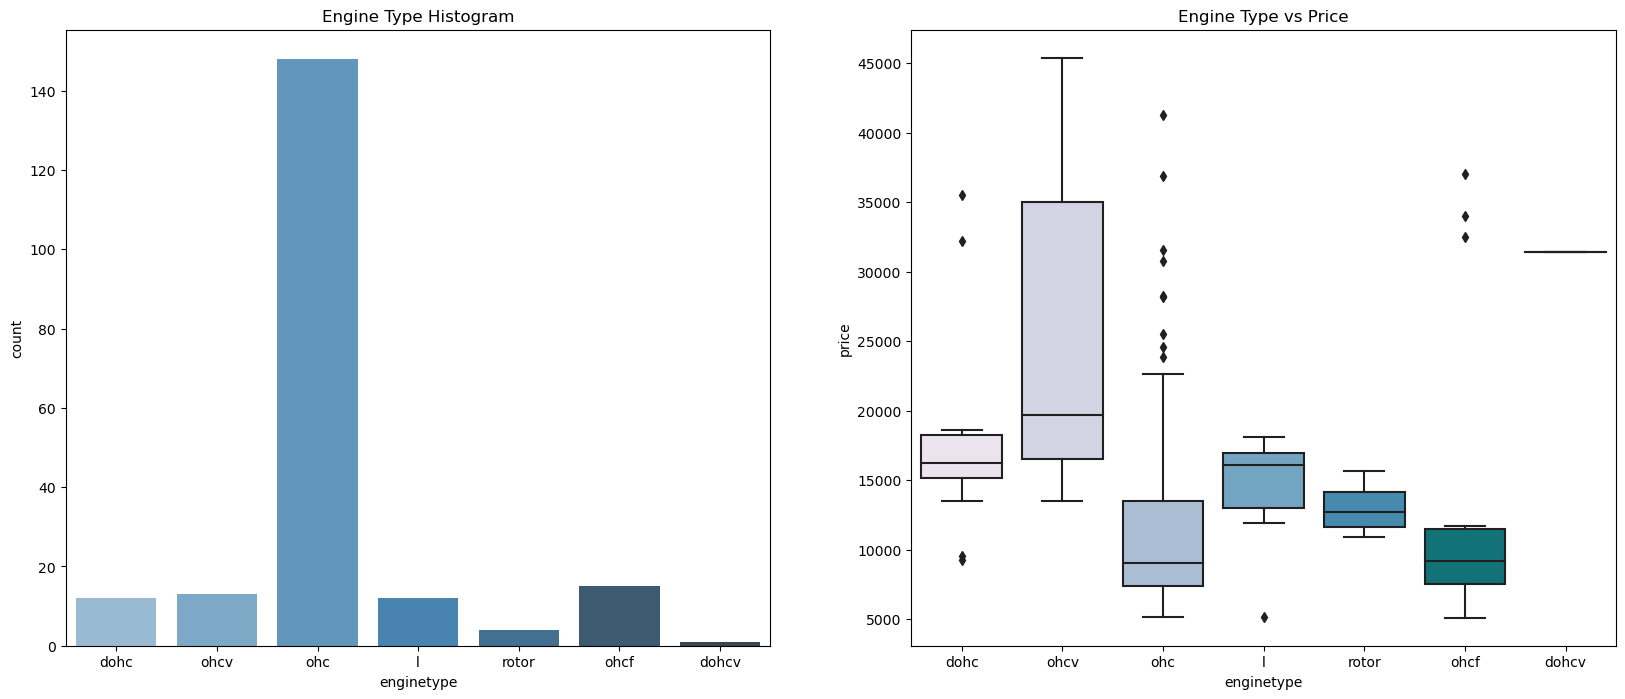

In [29]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

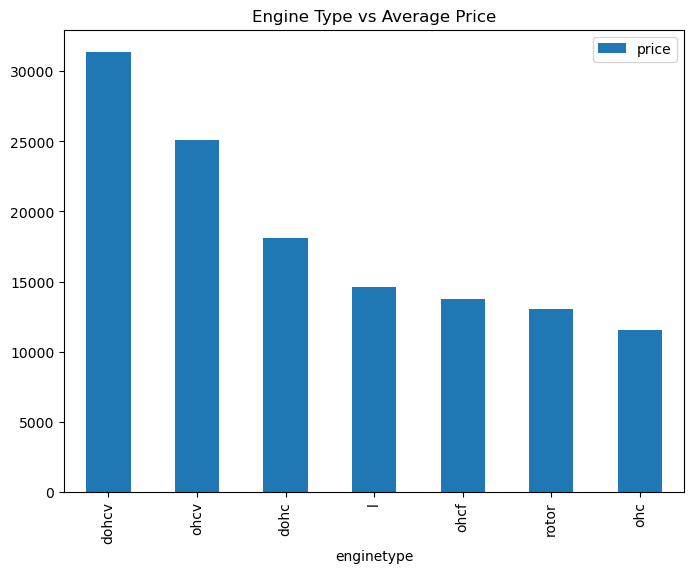

In [30]:
#Barchart for Enginetype vs price

base = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
base.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 2500x600 with 0 Axes>

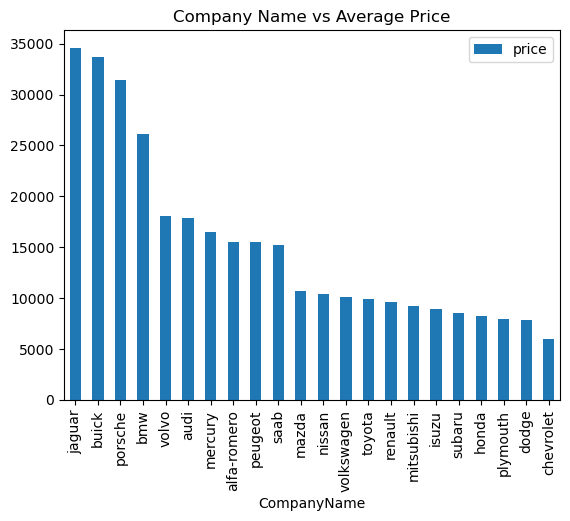

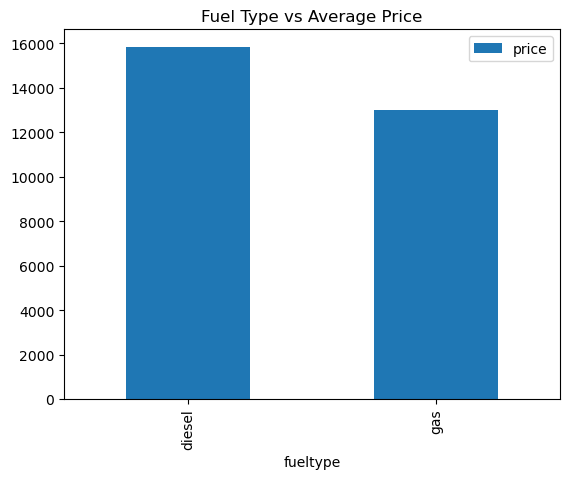

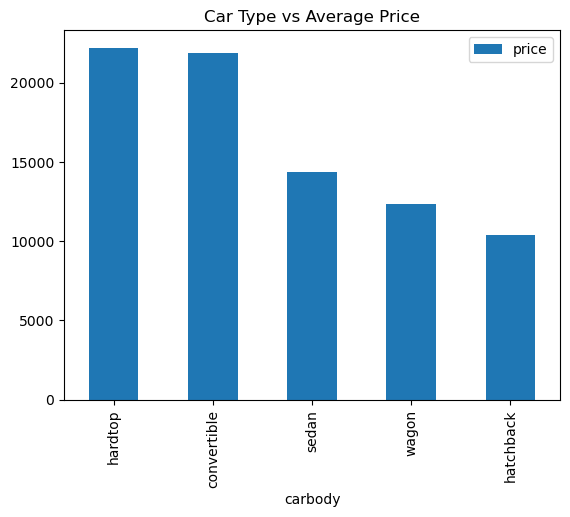

In [31]:
#barchart showing average price for Cmpany_name, fuel_type and carbody
plt.figure(figsize=(25, 6))

base = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
base.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

base = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
base.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

base = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
base.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

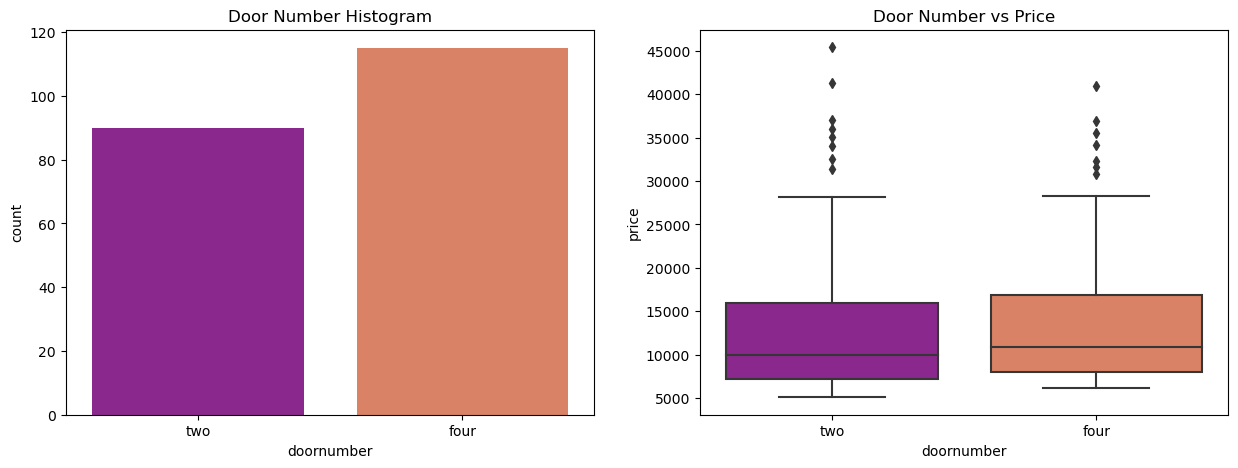

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()


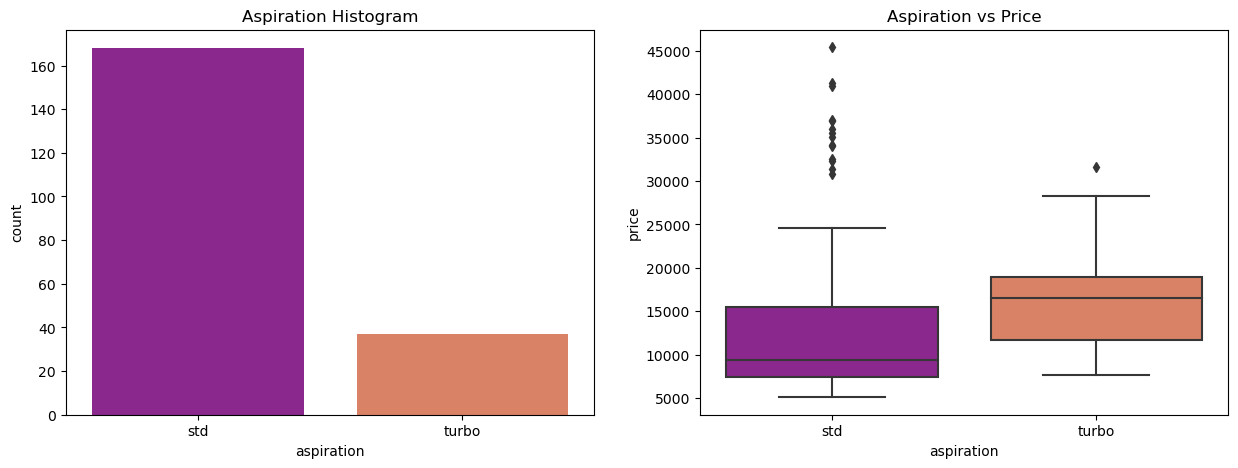

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

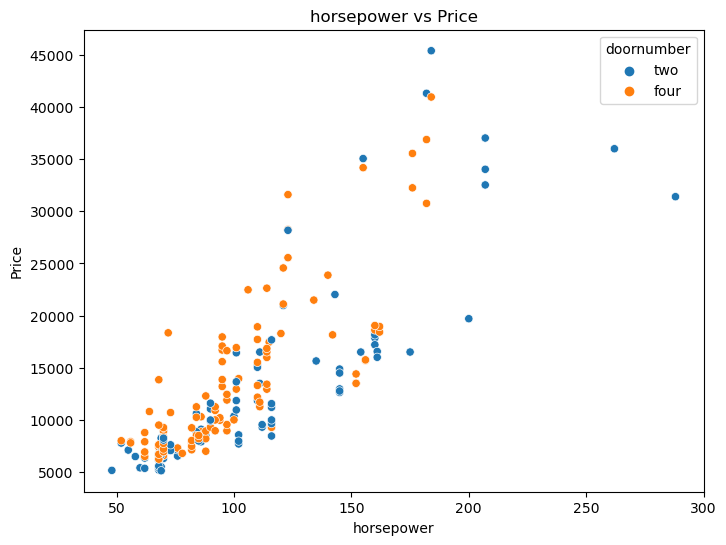

<Figure size 640x480 with 0 Axes>

In [34]:
#Bivariate Analysis
plt.figure(figsize=(8,6))

plt.title('horsepower vs Price')
sns.scatterplot(x=df['horsepower'],y=df['price'],hue=df['doornumber'])
plt.xlabel('horsepower')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

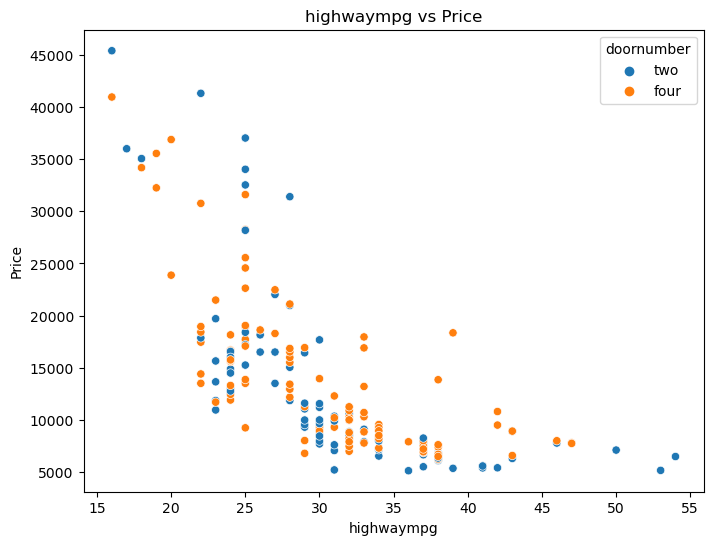

<Figure size 640x480 with 0 Axes>

In [35]:
#Bivariate Analysis
plt.figure(figsize=(8,6))

plt.title('highwaympg vs Price')
sns.scatterplot(x=df['highwaympg'],y=df['price'],hue=df['doornumber'])
plt.xlabel('highwaympg')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

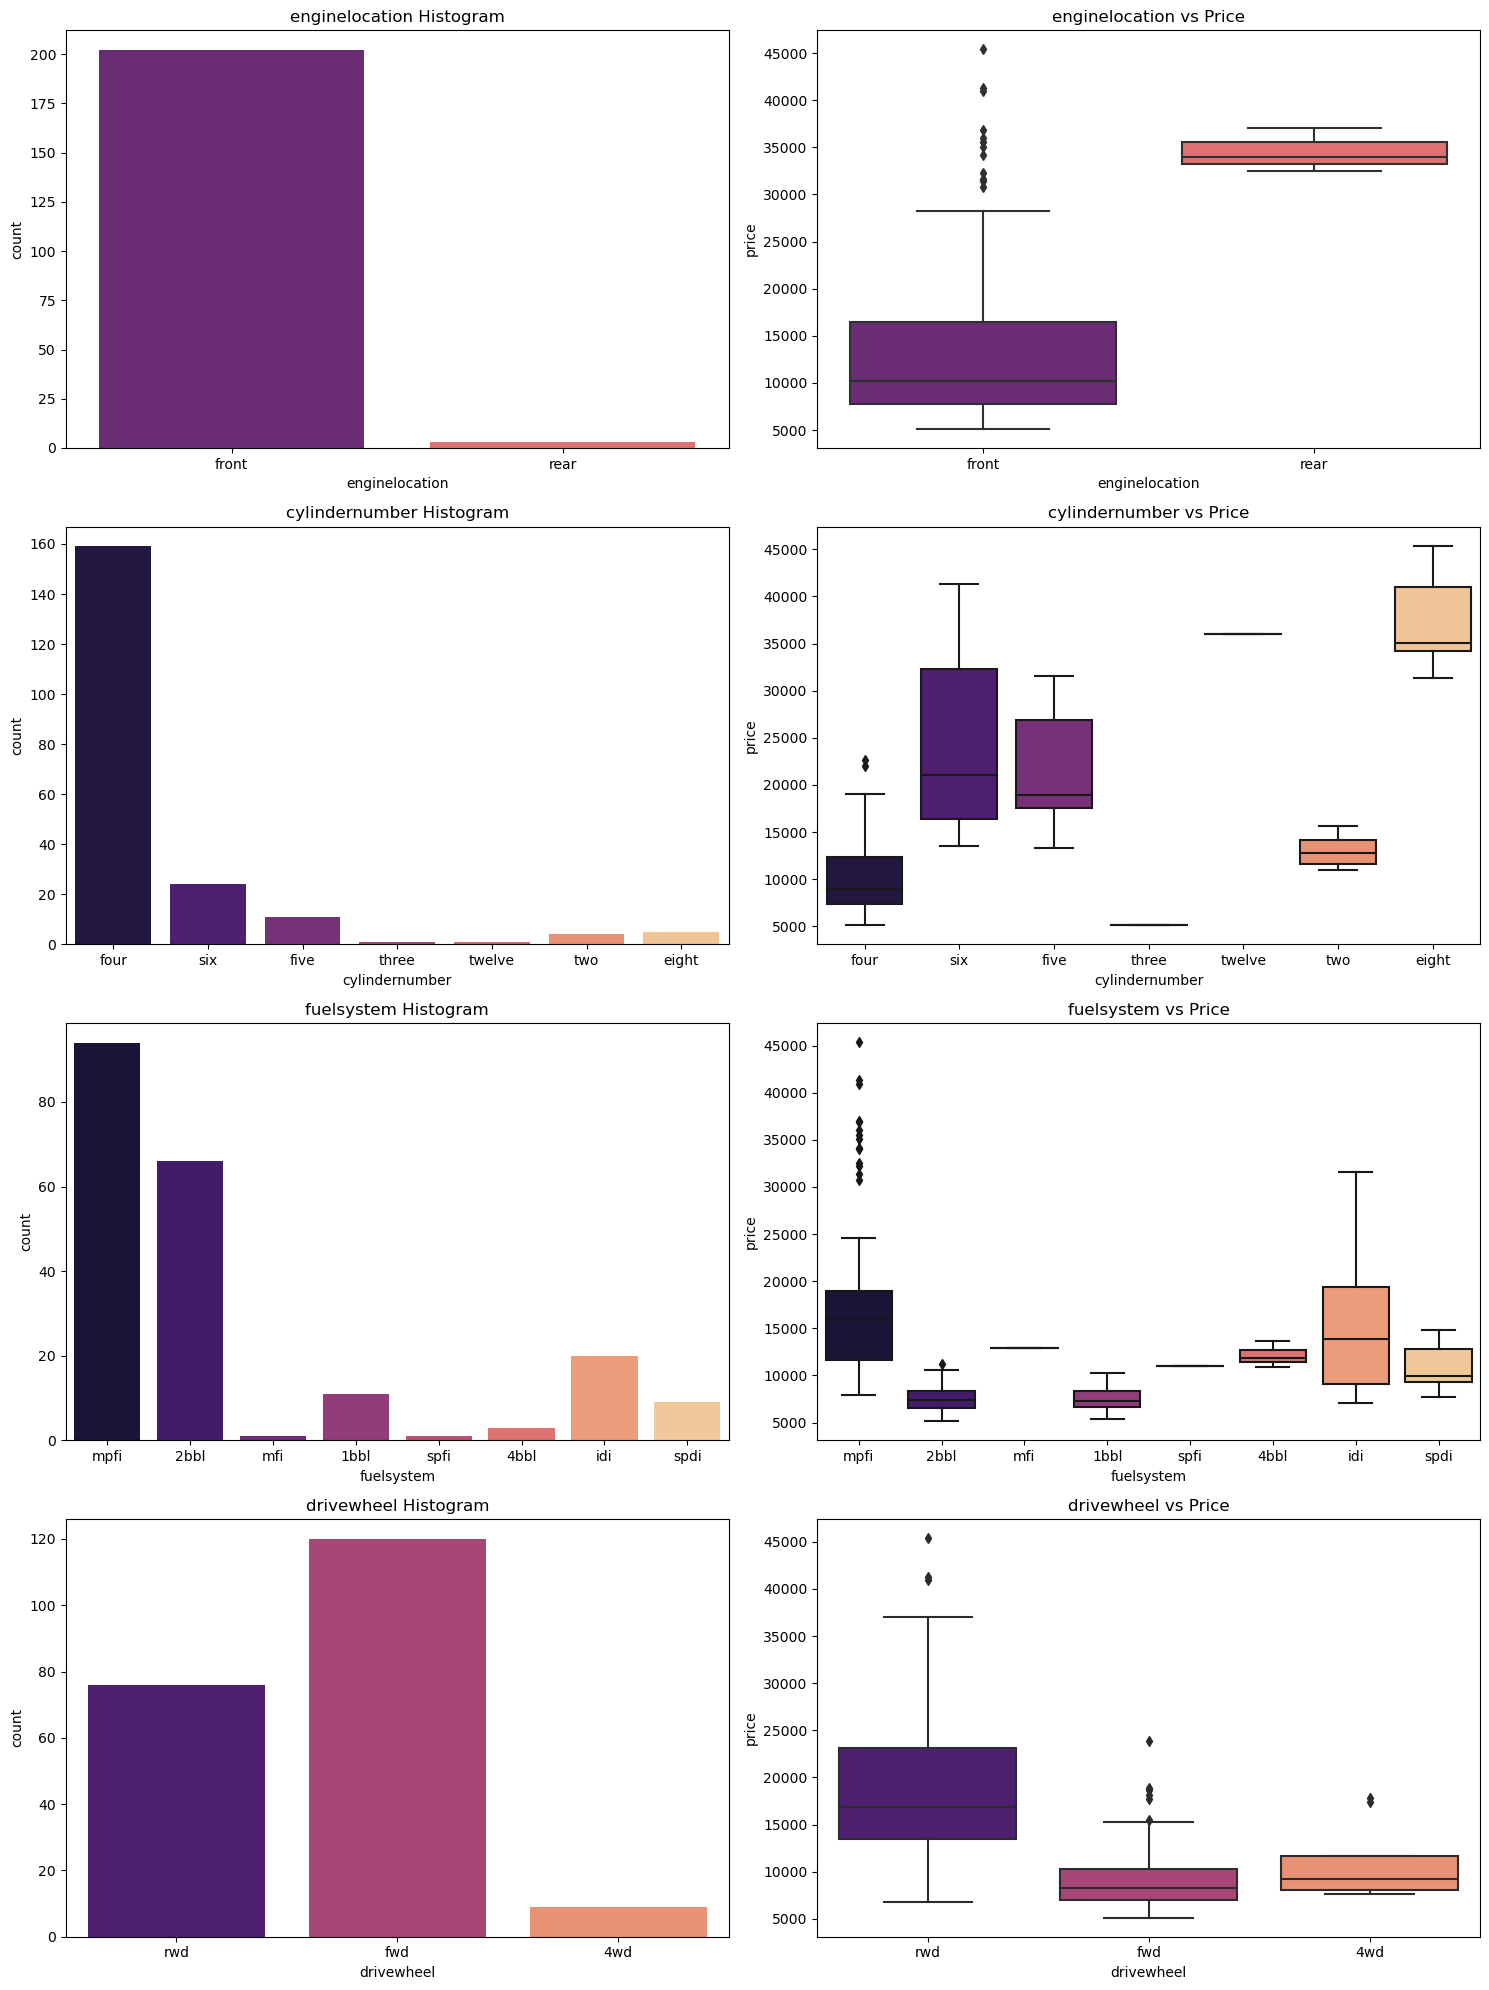

In [36]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

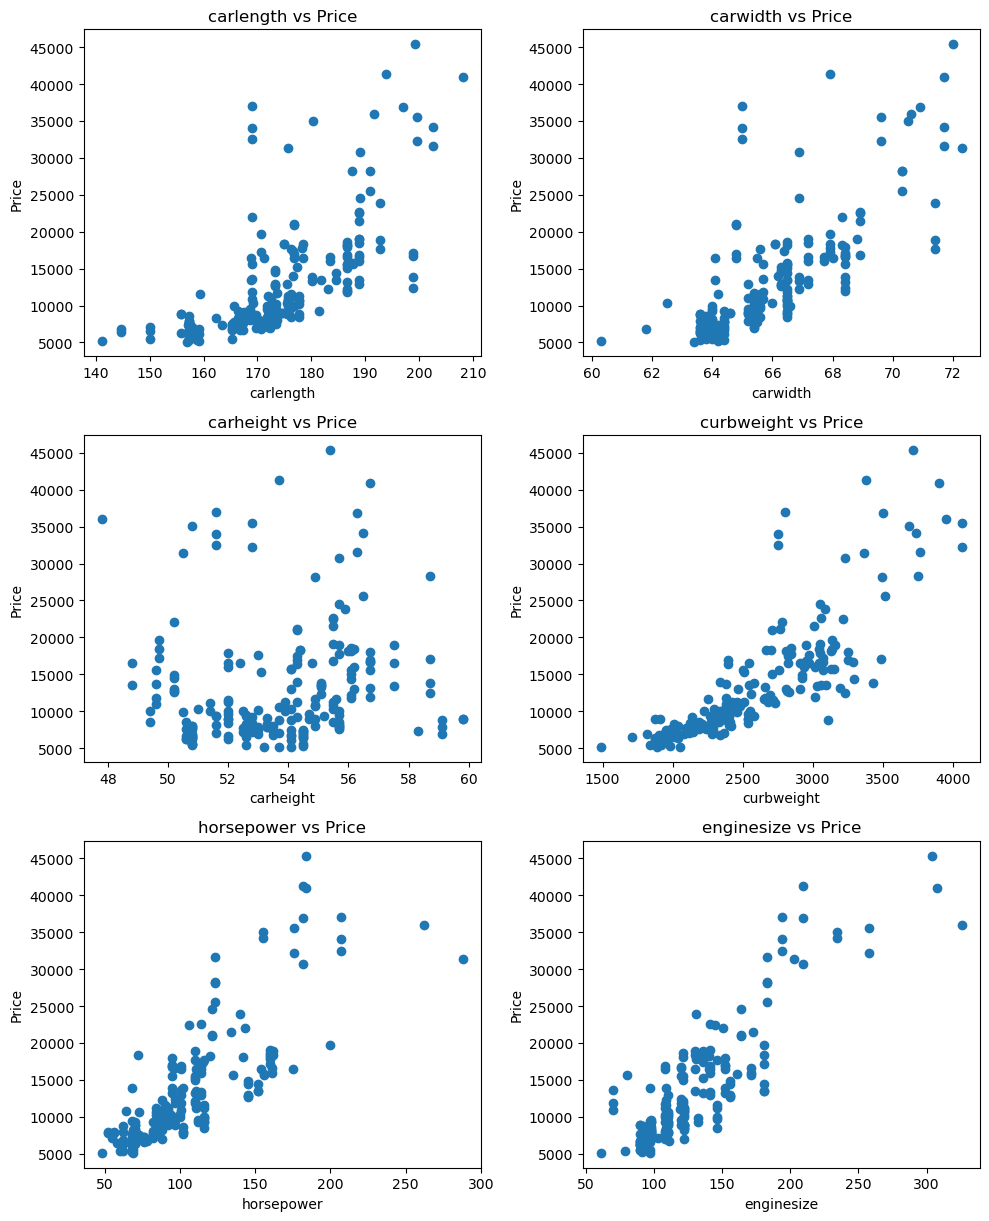

In [37]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('horsepower', 5)
scatter('enginesize', 6)

plt.tight_layout()

In [38]:
#checking the correllation with the target
df.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

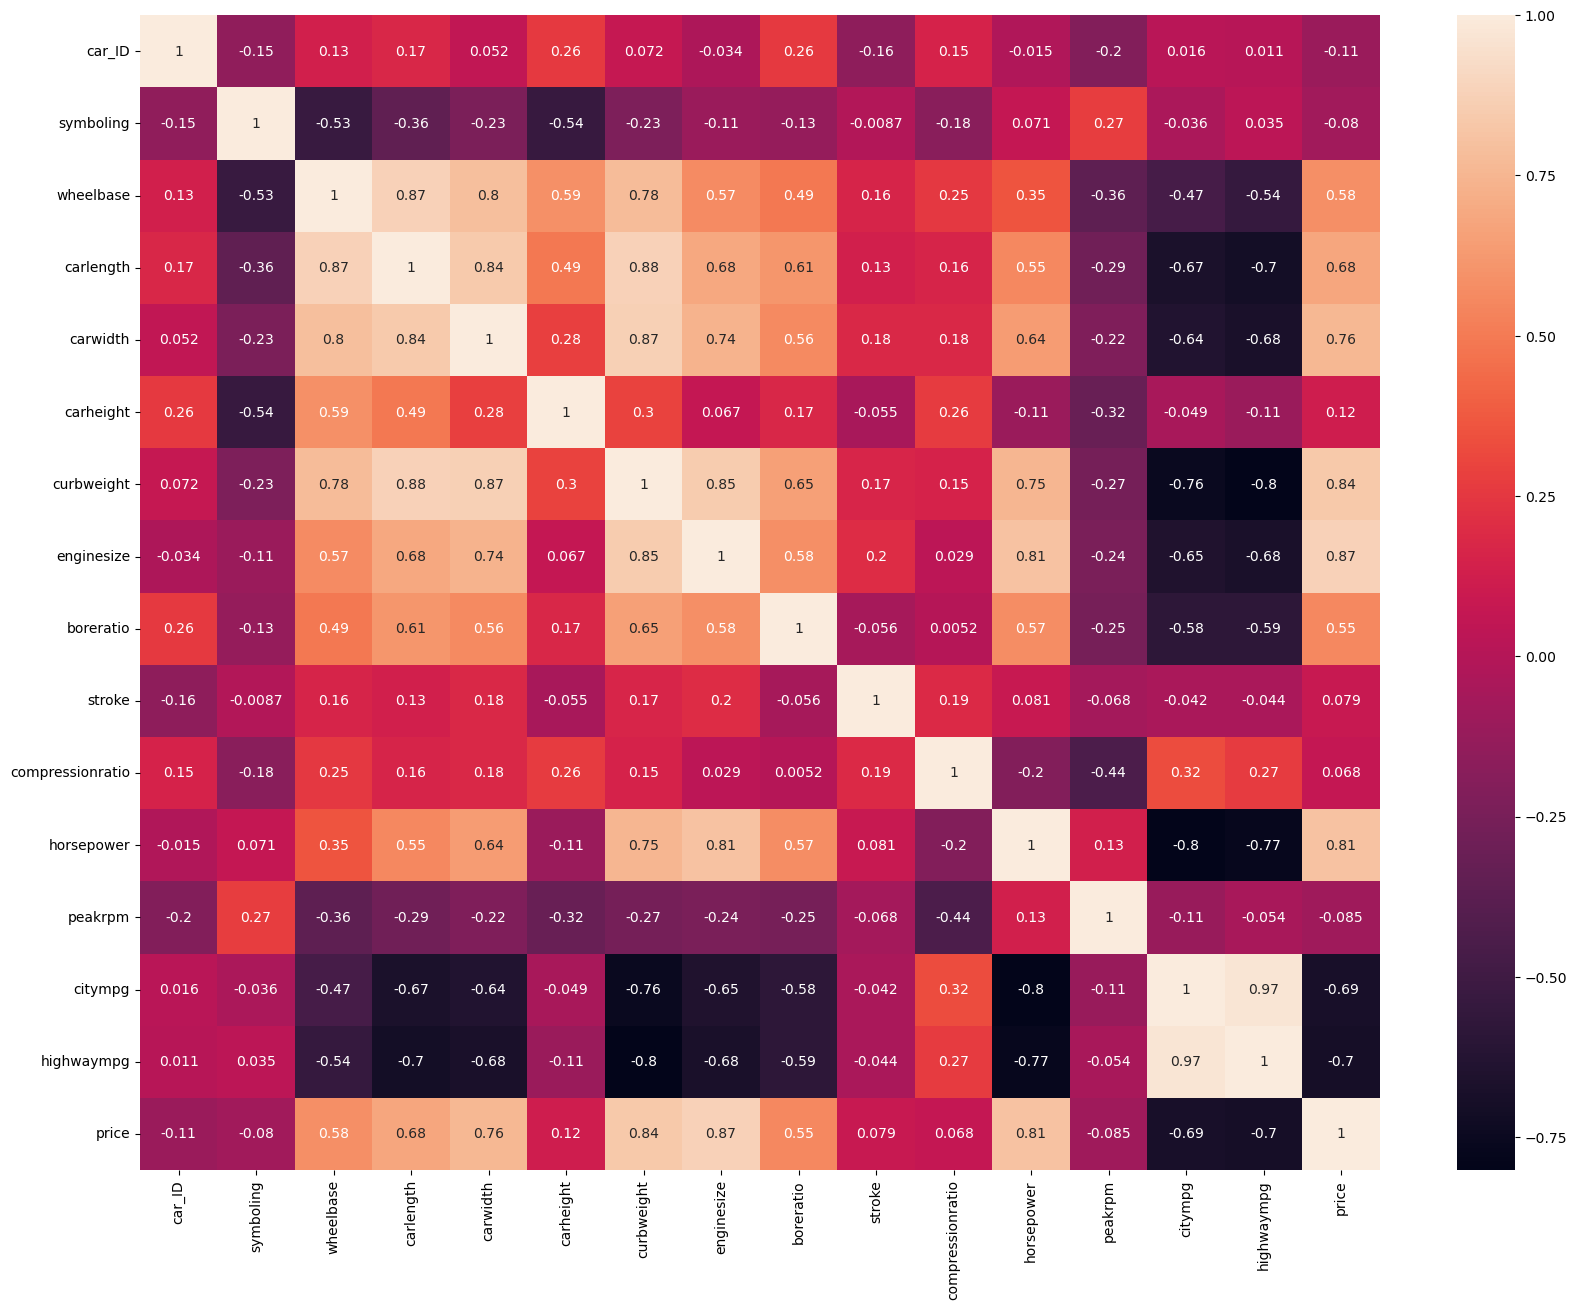

In [39]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

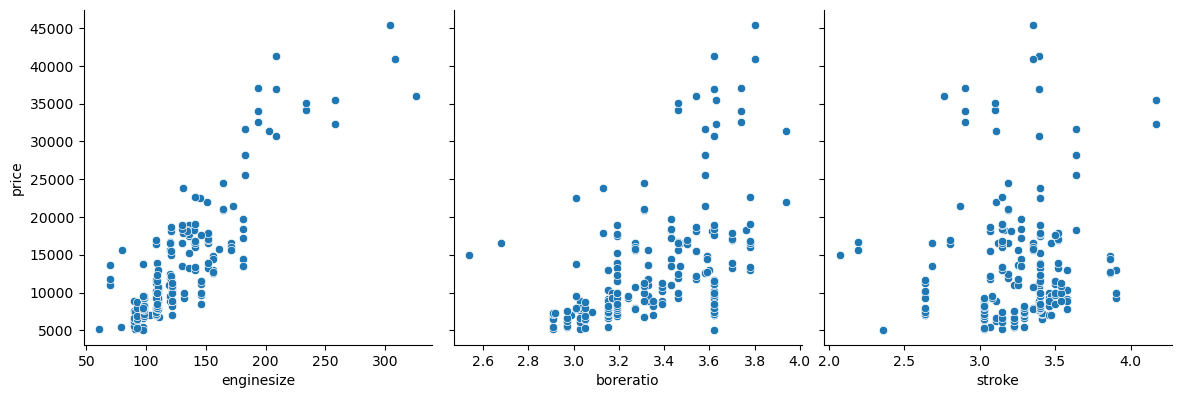

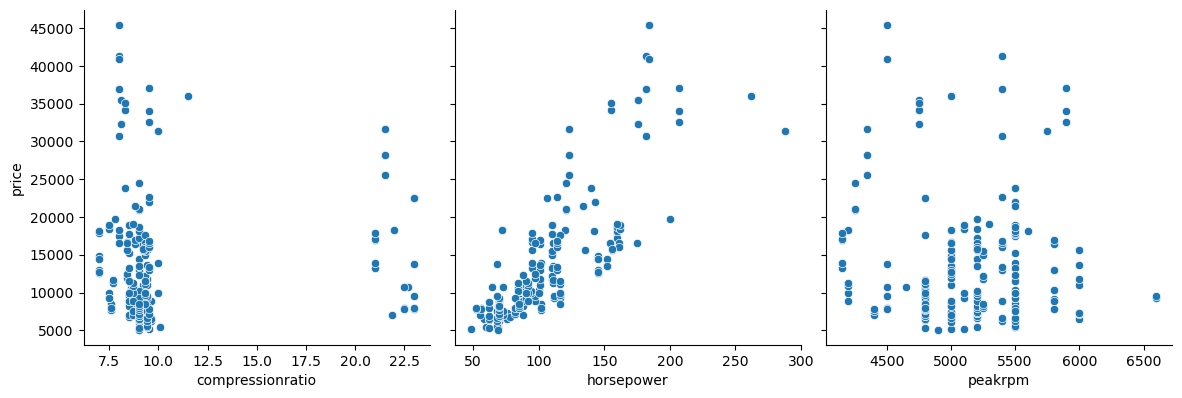

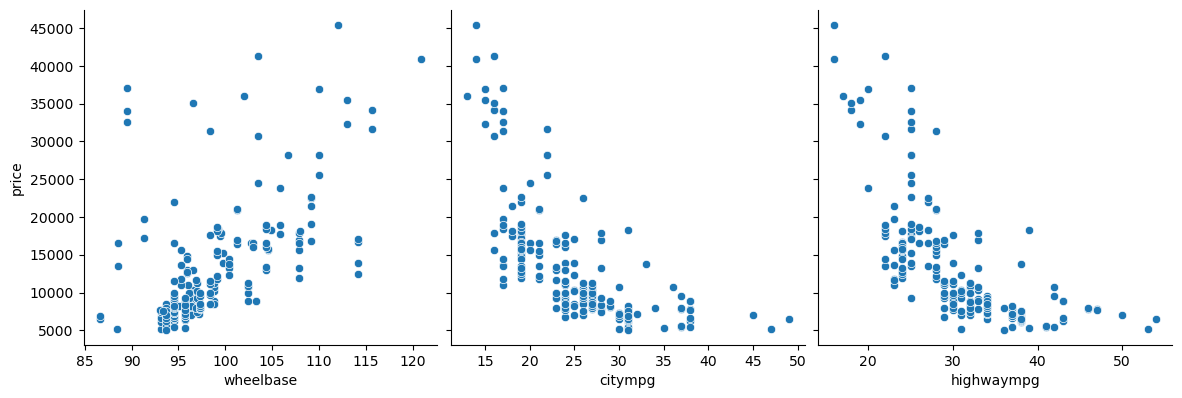

In [40]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

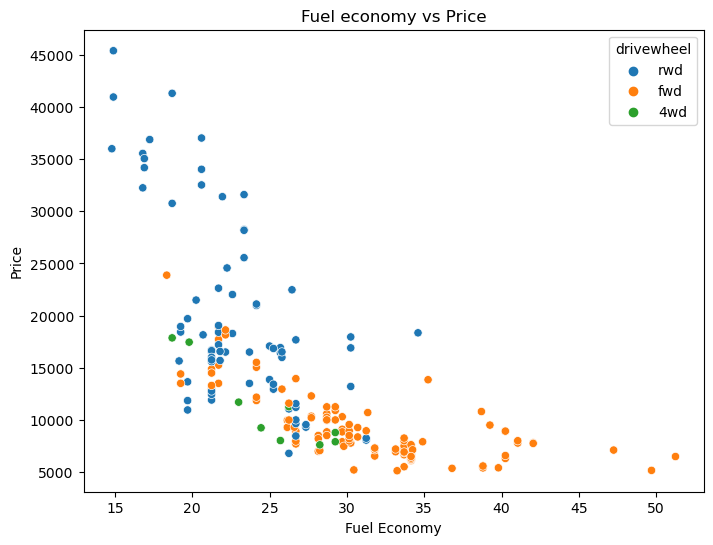

<Figure size 640x480 with 0 Axes>

In [41]:
#Bivariate Analysis

#Fuel economy: 55% of citympg + 45% of highmpg
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [42]:
features= df[['price','fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
features.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


In [43]:
features.shape

(205, 15)

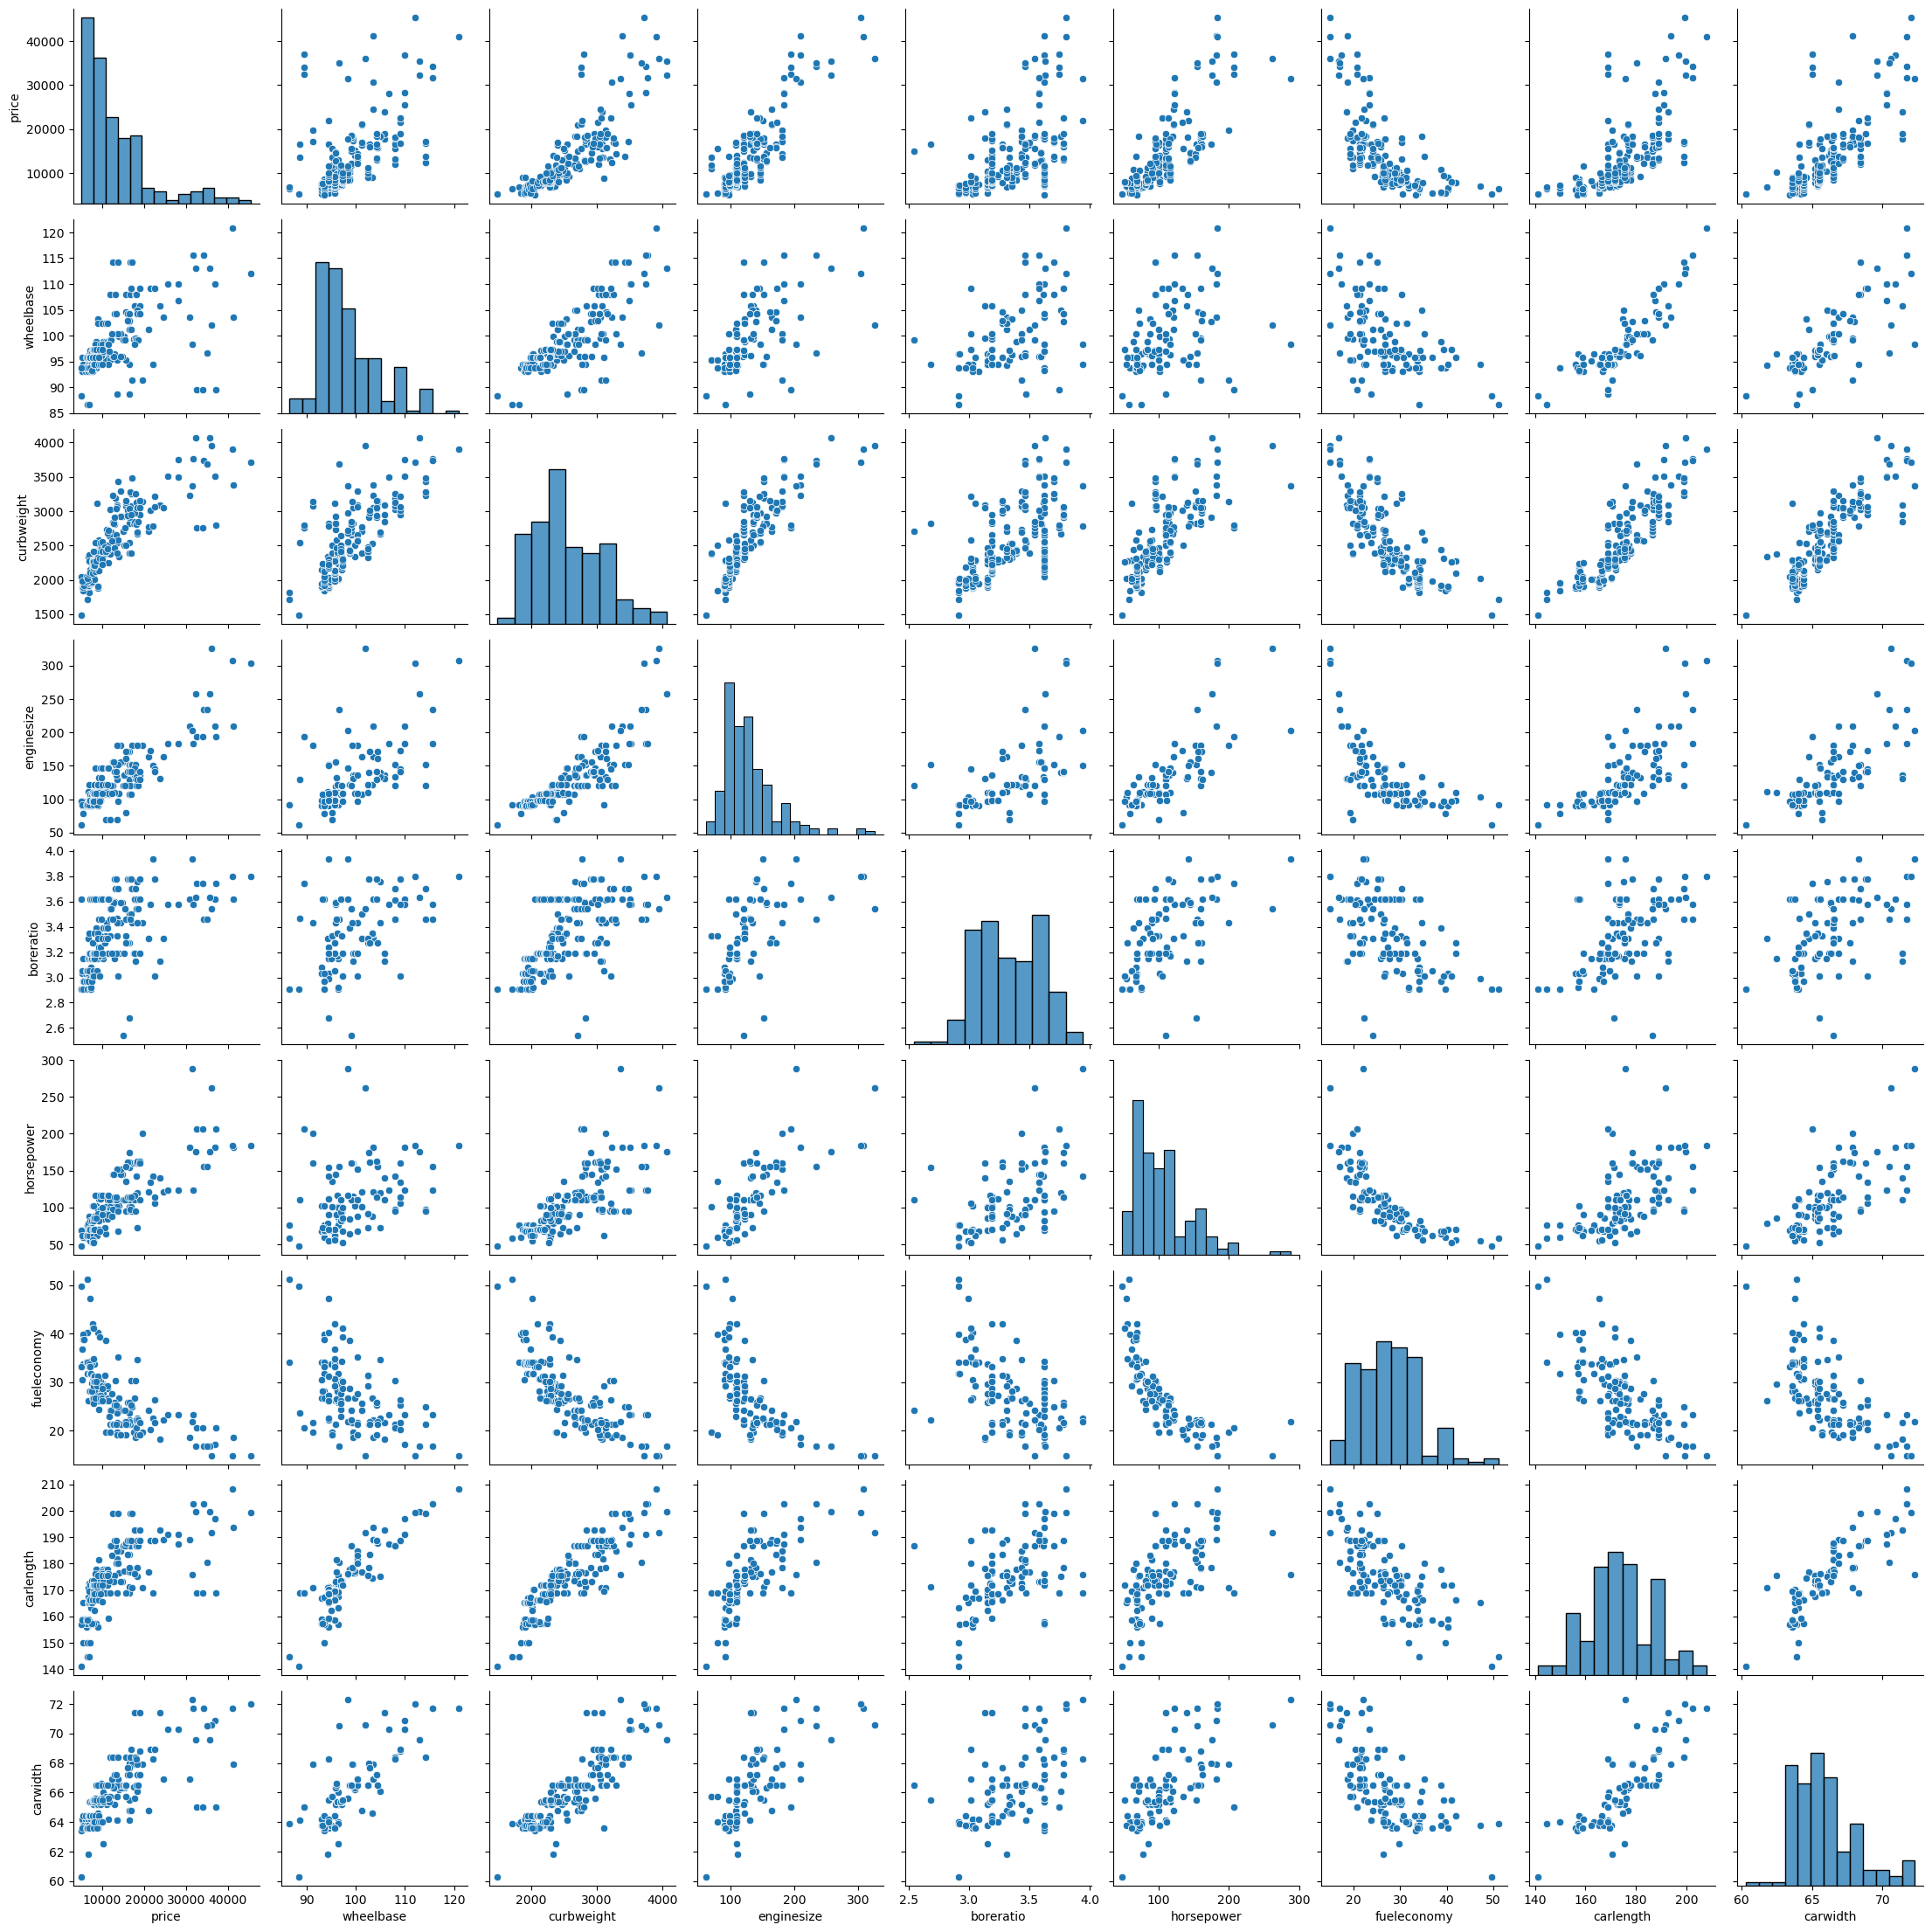

In [44]:
sns.pairplot(features)
plt.show()

In [45]:
# Defining the map function
def dummies(x,fit):
    temp = pd.get_dummies(fit[x], drop_first = True)
    fit = pd.concat([fit, temp], axis = 1)
    fit.drop([x], axis = 1, inplace = True)
    return fit
# Applying the function to the feature

features = dummies('fueltype',features)
features = dummies('aspiration',features)
features = dummies('carbody',features)
features = dummies('drivewheel',features)
features = dummies('enginetype',features)
features = dummies('cylindernumber',features)

In [46]:
features.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,1,0,0,0,1,0,0,0,0,0


### TRAINING OF MODEL

In [47]:
#Train-Test Split and feature scaling
from sklearn.model_selection import train_test_split

np.random.seed(0)
fit_train, fit_test = train_test_split(features, train_size = 0.8, test_size = 0.2, random_state = 100)

In [48]:
fit_test.shape

(41, 29)

In [49]:
fit_train.shape

(164, 29)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
target = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth']
fit_train[target] = scaler.fit_transform(fit_train[target])

In [51]:
fit_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
3,0.243998,0.455172,0.329325,0.181132,0.404762,0.225000,0.326475,0.577236,0.491667,1,...,1,0,0,0,0,1,0,0,0,0
157,0.057463,0.313793,0.240884,0.139623,0.404762,0.091667,0.503429,0.409756,0.341667,1,...,1,0,0,0,0,1,0,0,0,0
81,0.093406,0.334483,0.325834,0.230189,0.531746,0.166667,0.366255,0.518699,0.425000,1,...,1,0,0,0,0,1,0,0,0,0
32,0.007763,0.244828,0.135376,0.067925,0.182540,0.050000,0.685871,0.144715,0.308333,1,...,1,0,0,0,0,1,0,0,0,0
99,0.105838,0.365517,0.324282,0.222642,0.515873,0.204167,0.421125,0.525203,0.408333,1,...,1,0,0,0,0,1,0,0,0,0


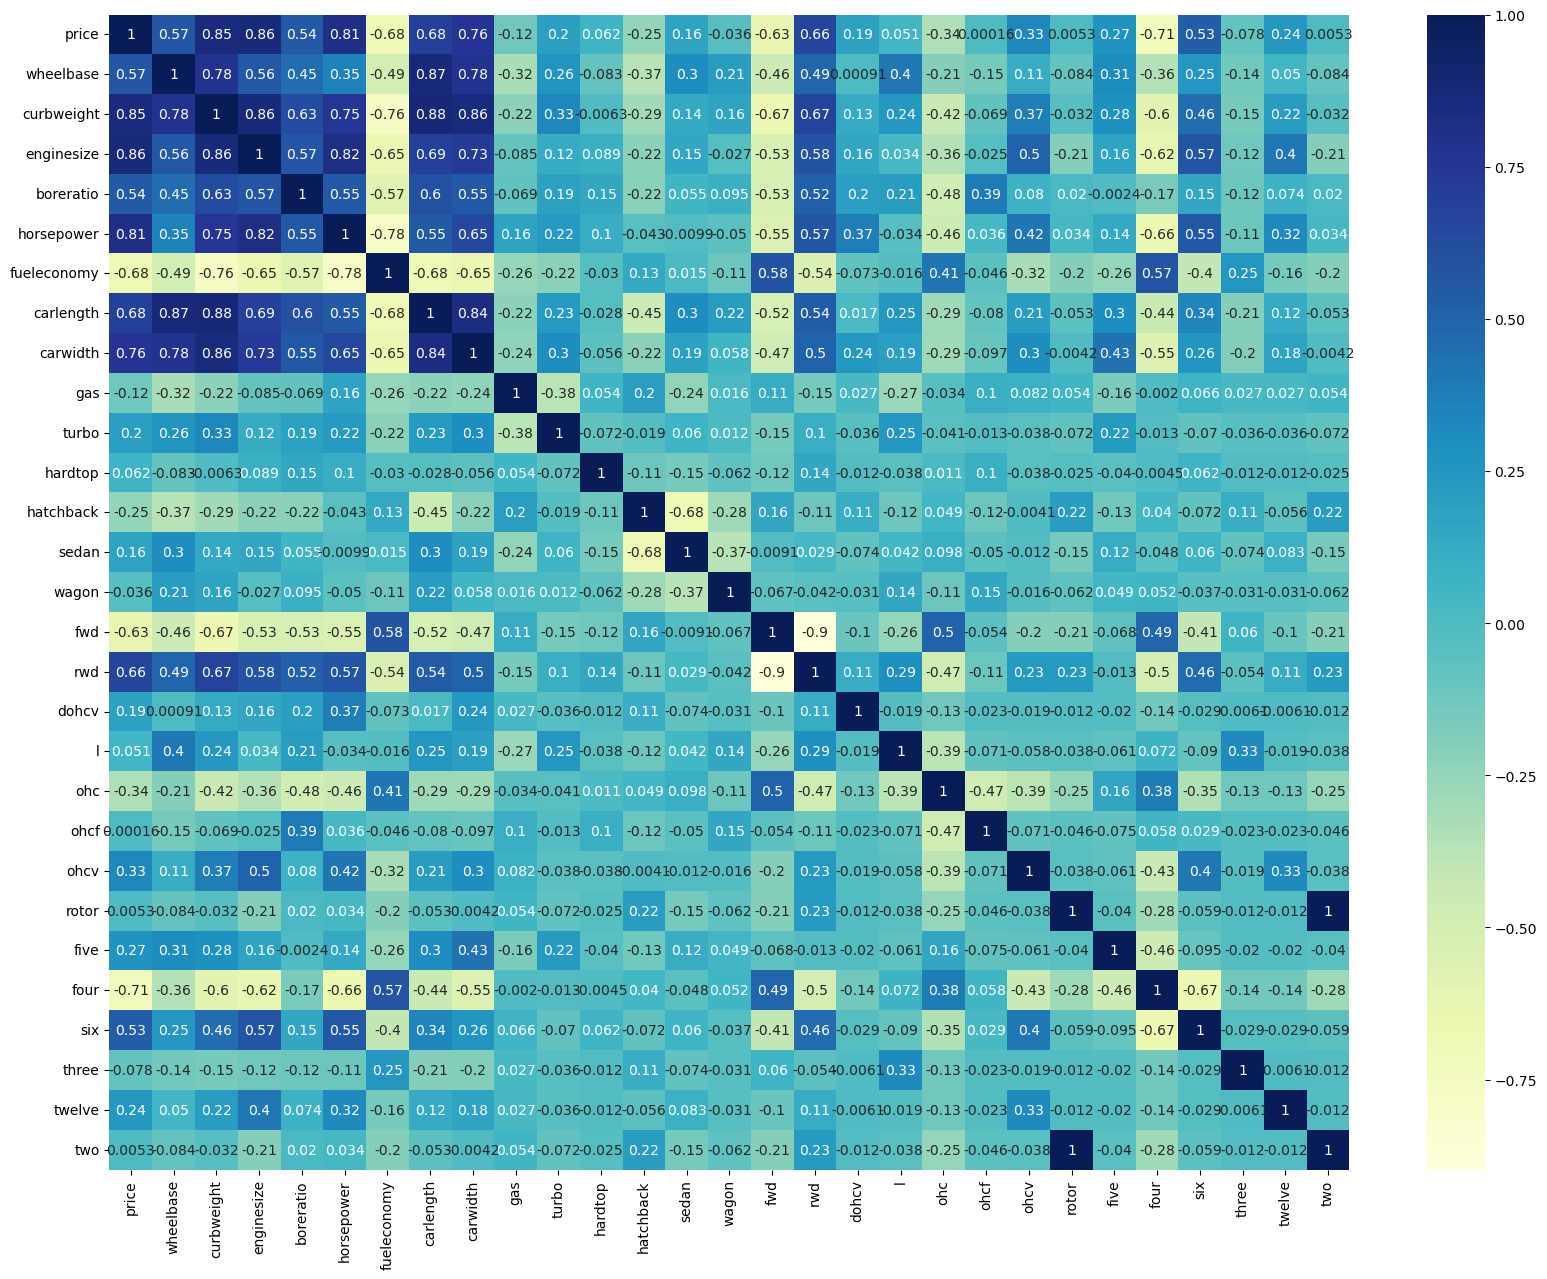

In [52]:
#Correlation using heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(fit_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [53]:
#checking the correllation with the target
fit_train.corr()['price'].sort_values()

four          -0.709920
fueleconomy   -0.680704
fwd           -0.626380
ohc           -0.338174
hatchback     -0.251748
gas           -0.122847
three         -0.077734
wagon         -0.035547
ohcf           0.000158
rotor          0.005339
two            0.005339
l              0.051017
hardtop        0.062223
sedan          0.164788
dohcv          0.190394
turbo          0.197039
twelve         0.237376
five           0.272994
ohcv           0.329509
six            0.531981
boreratio      0.544209
wheelbase      0.569241
rwd            0.664165
carlength      0.684234
carwidth       0.762071
horsepower     0.812608
curbweight     0.845345
enginesize     0.863011
price          1.000000
Name: price, dtype: float64

Highly correlated variables to the target, the price are - enginesize, curbweight, horsepower and carwidth.

In [54]:
#Dividing data into X and y variables
y_train = fit_train.pop('price')
X_train = fit_train

In [55]:
y_train.head().to_frame()

,price
3,0.243998
157,0.057463
81,0.093406
32,0.007763
99,0.105838


In [56]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
3,0.455172,0.329325,0.181132,0.404762,0.225000,0.326475,0.577236,0.491667,1,0,...,1,0,0,0,0,1,0,0,0,0
157,0.313793,0.240884,0.139623,0.404762,0.091667,0.503429,0.409756,0.341667,1,0,...,1,0,0,0,0,1,0,0,0,0
81,0.334483,0.325834,0.230189,0.531746,0.166667,0.366255,0.518699,0.425000,1,0,...,1,0,0,0,0,1,0,0,0,0
32,0.244828,0.135376,0.067925,0.182540,0.050000,0.685871,0.144715,0.308333,1,0,...,1,0,0,0,0,1,0,0,0,0
99,0.365517,0.324282,0.222642,0.515873,0.204167,0.421125,0.525203,0.408333,1,0,...,1,0,0,0,0,1,0,0,0,0


In [57]:
#fit the model
lm = LinearRegression()
lm.fit(X_train,y_train)
yhat=lm.predict(X_train)
yhat[0:5]

array([0.17889917, 0.02814763, 0.10052955, 0.00519505, 0.13143443])

In [66]:
from sklearn.metrics import r2_score 
lm.score(X_train, yhat)

1.0